In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\harip\Instacart Basket Analysis"

In [3]:
# Import Customers_orders_merged
df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data','customers_orders_merged.pkl'))

In [4]:
#Conducting the basic analysis
df.shape

(32404859, 34)

In [5]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_timing_in_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', ' price_range_loc', 'price_range_loc',
       'busiest_day', 'Busiest_days', 'Busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag',
       'median_days_prior_order', 'frequency_flag', 'First Name', 'Last Name',
       'Gender', 'State', 'Age', 'date_joined', 'No of dependants',
       'fam_status', 'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   product_id               int64   
 1   product_name             object  
 2   aisle_id                 int64   
 3   department_id            int64   
 4   prices                   float64 
 5   order_id                 int64   
 6   user_id                  int64   
 7   order_number             int64   
 8   orders_day_of_week       int64   
 9   orders_timing_in_day     int64   
 10  days_since_prior_order   float64 
 11  add_to_cart_order        int64   
 12  reordered                int64   
 13  _merge                   category
 14   price_range_loc         object  
 15  price_range_loc          object  
 16  busiest_day              object  
 17  Busiest_days             object  
 18  Busiest_period_of_day    object  
 19  max_order                int64   
 20  loyalty_flag          

# Step 2: Addressing the PII 

In [7]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_timing_in_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', ' price_range_loc', 'price_range_loc',
       'busiest_day', 'Busiest_days', 'Busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag',
       'median_days_prior_order', 'frequency_flag', 'First Name', 'Last Name',
       'Gender', 'State', 'Age', 'date_joined', 'No of dependants',
       'fam_status', 'income'],
      dtype='object')

Addressing PII data security by removing the first name and the last name columns in the dataframe. This makes the data confidential and more accessible to share it other officials.

In [8]:
#Removing both "first and last name" columns
df.drop(['First Name','Last Name'], axis=1 , inplace = True)

In [9]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_timing_in_day,...,spending_flag,median_days_prior_order,frequency_flag,Gender,State,Age,date_joined,No of dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


# Step 3: Customer behavior in different geographic areas

In [10]:
#Categorizing states based on Regions
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
# Creating the regions using loc function
# use the loc function to assign region based on states in 'State' column
df.loc[df['State'].isin(Northeast), 'Region'] = 'Northeast'
df.loc[df['State'].isin(Midwest), 'Region'] = 'Midwest'
df.loc[df['State'].isin(South), 'Region'] = 'South'
df.loc[df['State'].isin(West), 'Region'] = 'West'

In [12]:
#Checking the variables
df['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [13]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_timing_in_day,...,median_days_prior_order,frequency_flag,Gender,State,Age,date_joined,No of dependants,fam_status,income,Region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest


In [14]:
# comparing the total of column "Region" based on "State"
state_counts = df['State'].value_counts().sum()
region_counts = df['Region'].value_counts().sum()
if state_counts == region_counts:
    print("Both columns are the same")
else:
    print("Recheck")

Both columns are the same


# Checking for the spending habits in different regions

In [15]:
#To confirm the hypothesis creating a crosstab for spending flag
crosstab_Spending_Region = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)


In [16]:
crosstab_Spending_Region

spending_flag,High spender,Low spender
Region,,
Midwest,7589534,7791
Northeast,5717129,5607
South,10781873,10012
West,8284425,8488


Text(0, 0.5, 'Average price in USD')

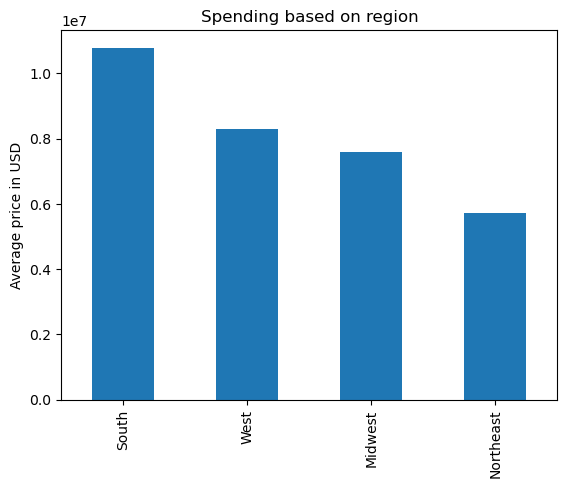

In [17]:
Region = df['Region'].value_counts().plot.bar()
plt.title('Spending based on region')
plt.ylabel('Average price in USD')

From the bar chart is very clear the highest count of low spenders are from South Region.

In [18]:
#Exporting the 'Customers_orders_Updated'
df.to_pickle(os.path.join(path,'02 Data', 'Prepared Data','customers_orders_Updated.pkl'))

In [19]:
# exporting the vizualization
Region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Region.png'))